<a href="https://colab.research.google.com/github/farhanramadhn23/Projek-Analisis-Data-dengan-Python/blob/main/Bike_Sharing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Menyiapkan Library





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

##Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("\nMissing Values in Day Dataset:\n", day_df.isnull().sum())
print("\nMissing Values in Hour Dataset:\n", hour_df.isnull().sum())


Missing Values in Day Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in Hour Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##Cleaning Data / Memperbaiki Tipe Data

In [ ]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
hour_df['hour'] = hour_df['hr']

In [ ]:
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

In [ ]:
print("\nTransformed day dataset:\n", day_df.head())
print("\nTransformed hour dataset:\n", hour_df.head())


Transformed day dataset:
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  day_of_week  
0   985            5  
1   801            

#Exploratory Data Analysis

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,3.002736
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,1.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,3.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,6.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,2.004787


###Analisis Distribusi penggunaan sepeda berdasarkan waktu (jam, hari, musim)

In [ ]:
day_df.groupby(by="season").agg({
    "registered": "nunique",
    "cnt" : ["max", "min", "mean", "std"]
})

registered   cnt                                
          nunique   max   min         mean          std
season                                                 
1             177  7836   431  2604.132597  1399.942119
2             180  8362   795  4992.331522  1695.977235
3             181  8714  1115  5644.303191  1459.800381
4             177  8555    22  4728.162921  1699.615261

**insight 1:** jumlah pengguna pada season ke-3 merupakan rata-rata yang paling tinggi. diikuti dengan rata-rata season ke-2, dan yang paling rendah adalah rata-rata season ke-1.

**insight 2:** standar deviasi (std) menunjukkan seberapa besar variasi penyewaan sepeda. Musim dengan penyebaran tertinggi adalah season 2 (std = 1695.98) dan season 4 (std = 1699.61).

**kesimpulan:** dapat disimpulkan bahwa banyaknya pengguna rata-rata(disini saya menggunakan patokan mean dalam menganalisis jumlah pengguna) sepeda terjadi pada season 3, dan Fluktuasi atau variasi penyewaan lebih besar di season 2 dan season 4, dibandingkan dengan musim lainnya.

<ipython-input-59-31862f86ab36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='Set3')


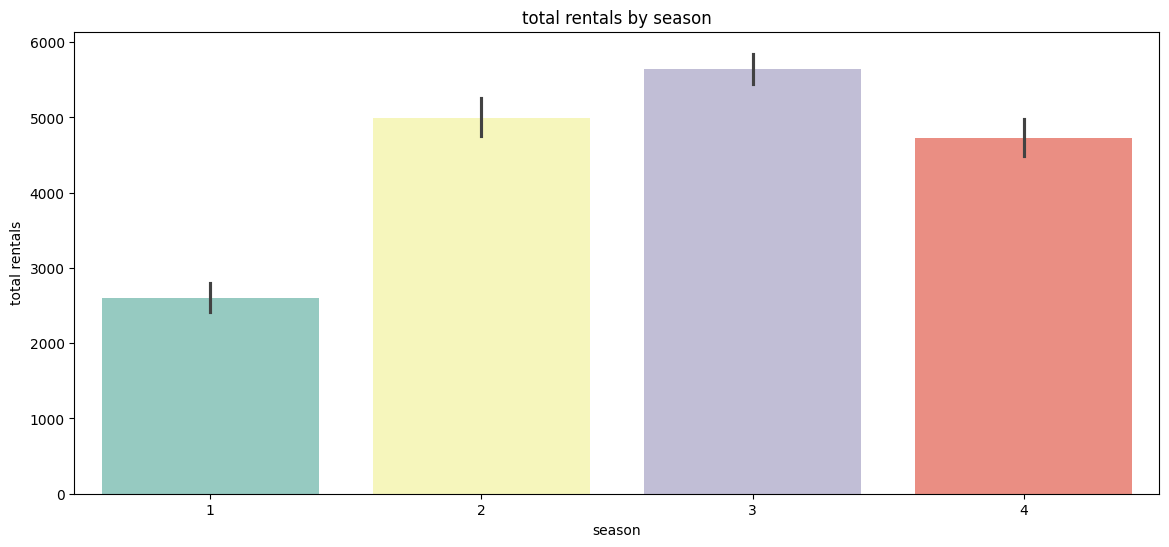

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='season', y='cnt', data=day_df, palette='Set3')
plt.title('total rentals by season')
plt.xlabel('season')
plt.ylabel('total rentals')
plt.show()

In [ ]:
day_df.groupby(by="day_of_week").agg({
    "registered" : "nunique",
    "cnt" : ["max", "min", "mean", "std"]
})

registered   cnt                                
               nunique   max   min         mean          std
day_of_week                                                 
0                  102  7525    22  4338.123810  1793.074013
1                  104  7767   683  4510.663462  1826.911642
2                  104  8173   441  4548.538462  2038.095884
3                  104  7804   431  4667.259615  1939.433317
4                  103  8362  1167  4690.288462  1874.624870
5                  105  8714   627  4550.542857  2196.693009
6                  103  8227   605  4228.828571  1872.496629

**insight 1:** Hari dengan rata-rata penyewaan tertinggi adalah day_of_week = 4, dengan rata-rata 4690.29 penyewaan dan nilai puncak max tertinggi adalah day_of_week = 5 dengan max 8714.

**insight 2:** Hari dengan fluktuasi penyewaan tertinggi adalah day_of_week = 5 dengan standar deviasi 2196.69, yang menunjukkan variabilitas jumlah penyewaan yang lebih tinggi pada hari tersebut.

**kesimpulan:** Penggunaan sepeda lebih tinggi pada hari-hari kerja seperti day 3 dan 4, dengan rata-rata penyewaan tertinggi.
Akhir pekan day 5 dan 6 cenderung memiliki penyewaan yang fluktuatif. Meskipun penyewaan sepeda mencapai puncak tertinggi pada day 5, variasi atau ketidakpastian jumlah pengguna juga lebih tinggi.

<ipython-input-53-b46ef7bafdff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis')


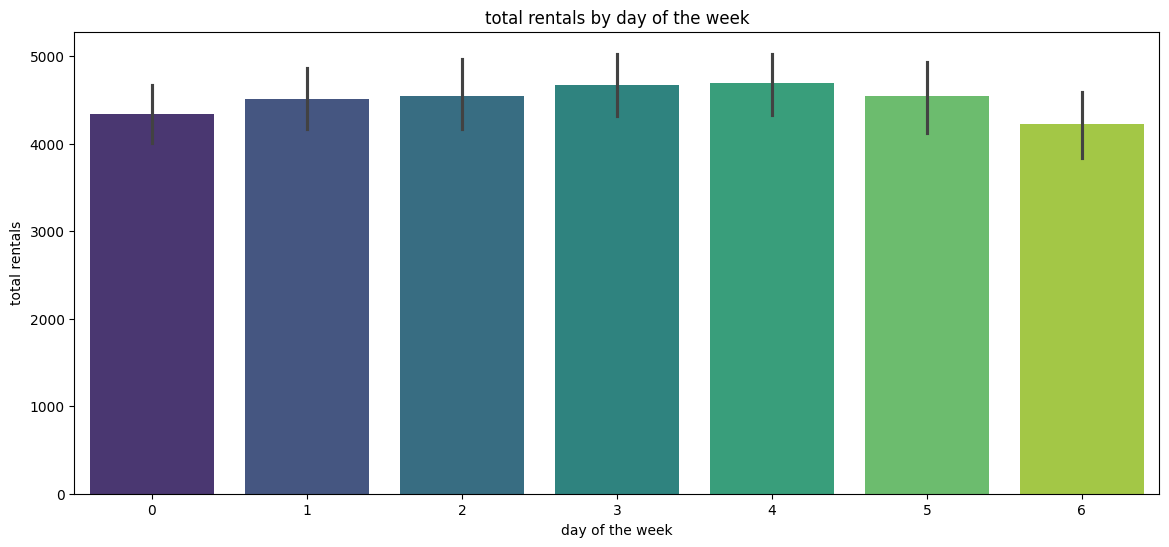

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis')
plt.title('total rentals by day of the week')
plt.xlabel('day of the week')
plt.ylabel('total rentals')
plt.show()

###Rental By Hour

In [ ]:
hour_df.groupby(by="hour").agg({
    "registered" : "nunique",
    "cnt" : ["max", "min", "mean", "std"]
})

registered  cnt                            
        nunique  max min        mean         std
hour                                            
0           135  283   2   53.898072   42.307910
1           107  168   1   33.375691   33.538727
2            86  132   1   22.869930   26.578642
3            44   79   1   11.727403   13.239190
4            19   28   1    6.352941    4.143818
5            54   66   1   19.889819   13.200765
6           178  213   1   76.044138   55.084348
7           349  596   1  212.064649  161.441936
8           445  839   5  359.011004  235.189285
9           302  426  14  219.309491   93.703458
10          243  539   8  173.668501  102.205413
11          271  663  10  208.143054  127.495536
12          302  776   3  253.315934  145.081134
13          298  760  11  253.661180  148.107657
14          285  750  12  240.949246  147.271574
15          291  750   7  251.233196  144.632541
16          328  783  11  311.983562  148.682618
17          460  976  15  461.452055  232.656611
18          462  977  23  425.510989  224.639304
19          392  743  11  311.523352  161.050359
20          320  567  11  226.030220  119.670164
21          265  584   6  172.314560   89.788893
22          213  502   9  131.335165   69.937782
23          161  256   2   87.831044   50.846889

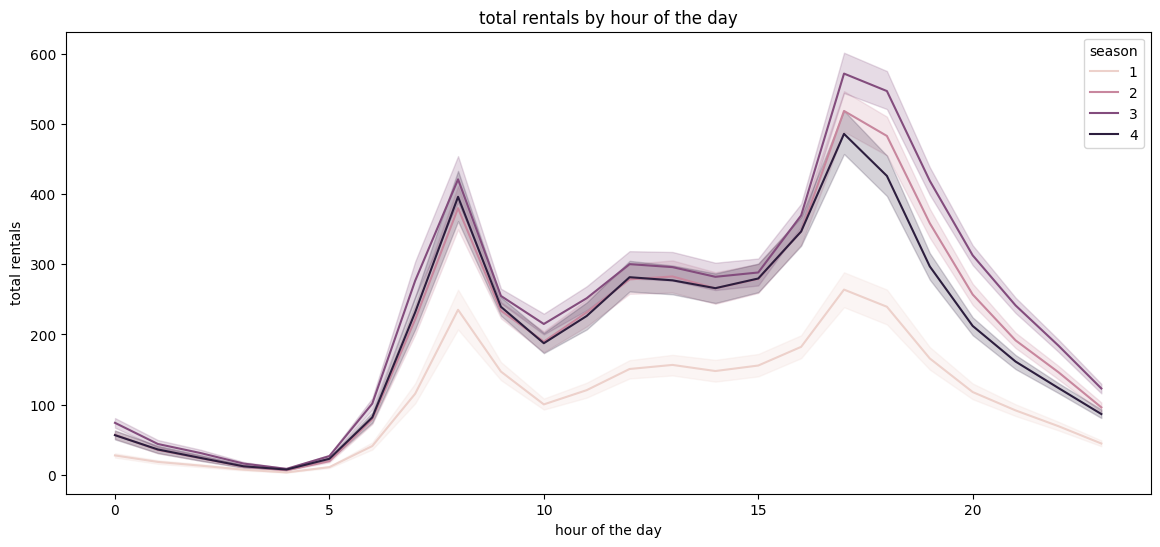

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hour', y='cnt', data=hour_df, hue='season')
plt.title('total rentals by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('total rentals')
plt.legend(title='season')
plt.show()

###Effect of weather conditions on rentals

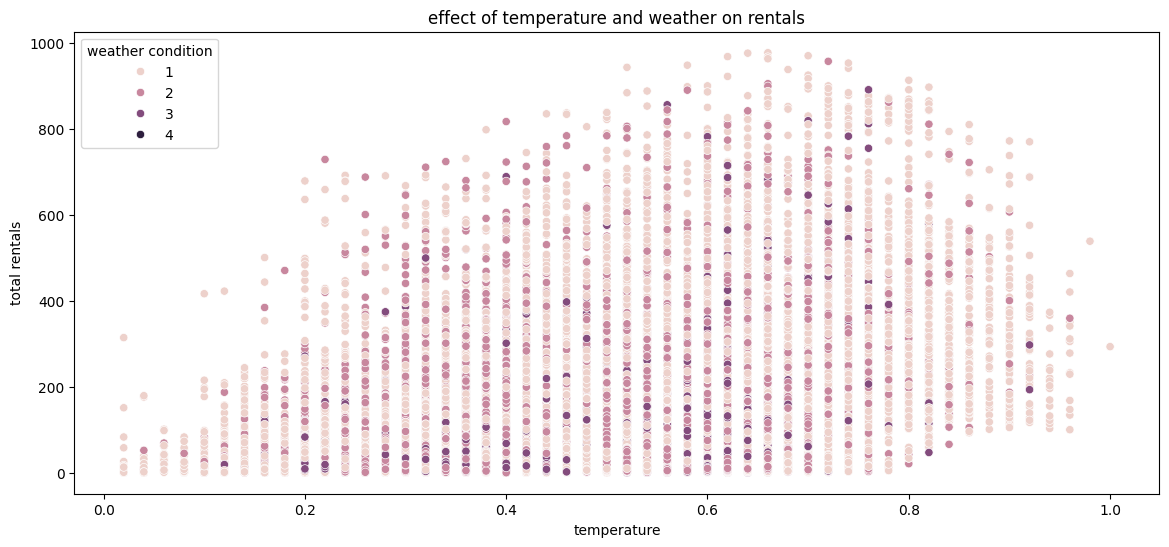

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit')
plt.title('effect of temperature and weather on rentals')
plt.xlabel('temperature')
plt.ylabel('total rentals')
plt.legend(title='weather condition')
plt.show()

#Visualization and Explanatory Analysis

###visualisasi distribusi pengguna berdasarkan waktu dan musim

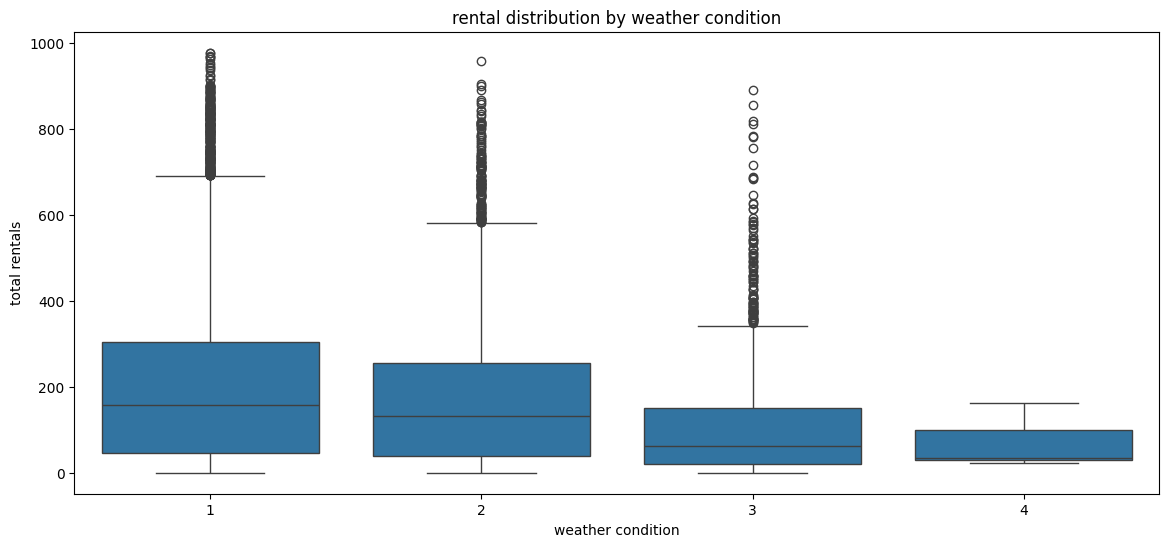

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('rental distribution by weather condition')
plt.xlabel('weather condition')
plt.ylabel('total rentals')
plt.show()

###visualisasi distribusi pengguna berdasarkan hari kerja dan weekend

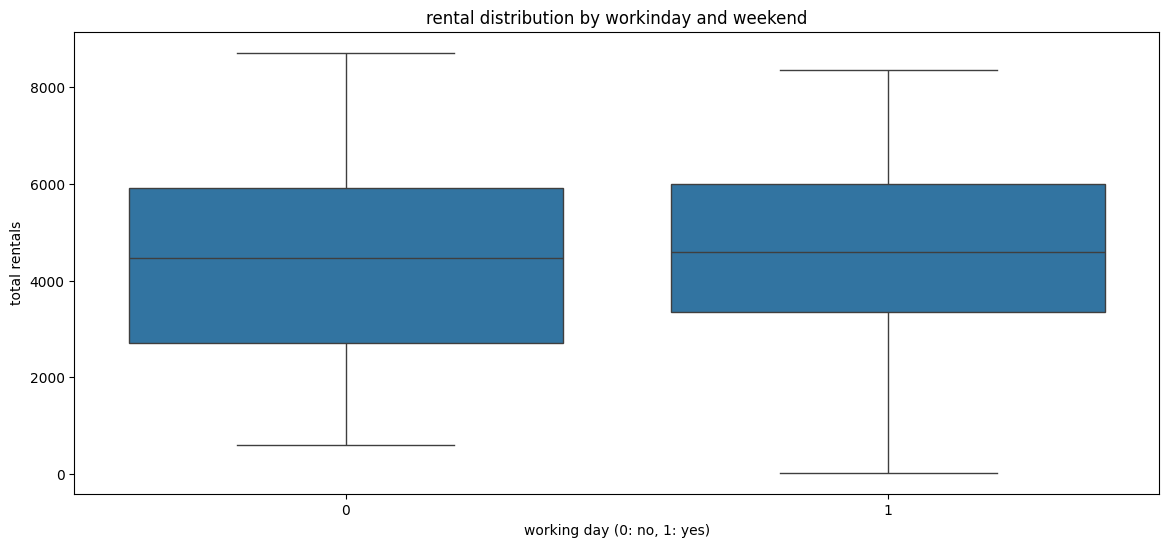

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('rental distribution by workinday and weekend')
plt.xlabel('working day (0: no, 1: yes)')
plt.ylabel('total rentals')
plt.show()

#Analisis Lanjutan

###Regresi Linier untuk mengetahui pengaruh fitur cuaca terhadap pengguna sepeda

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = hour_df[['temp', 'hum', 'windspeed', 'season', 'weathersit']]
y = hour_df['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nRegression coefficients:\n", coefficients)


Regression coefficients:
             Coefficient
temp         323.522461
hum         -307.248460
windspeed     33.599582
season        21.551882
weathersit     8.186042


###model evaluation

In [ ]:
score = model.score(X_test, y_test)
print("\nModel R^2 Score:\n", score)


Model R^2 Score:
 0.2626027743092295


In [ ]:
day_df.to_csv("all_data.csv", index=False)
hour_df.to_csv("all_data.csv", index=False)